In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
workingfolder = "/Users/esa2/Code/Personal/DataScience/DataScience/Fifa18/"
datafile = "data2.csv"
datafilepath = workingfolder+datafile
%matplotlib inline
df = pd.read_csv(datafilepath)
df.head(7)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Su√°rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


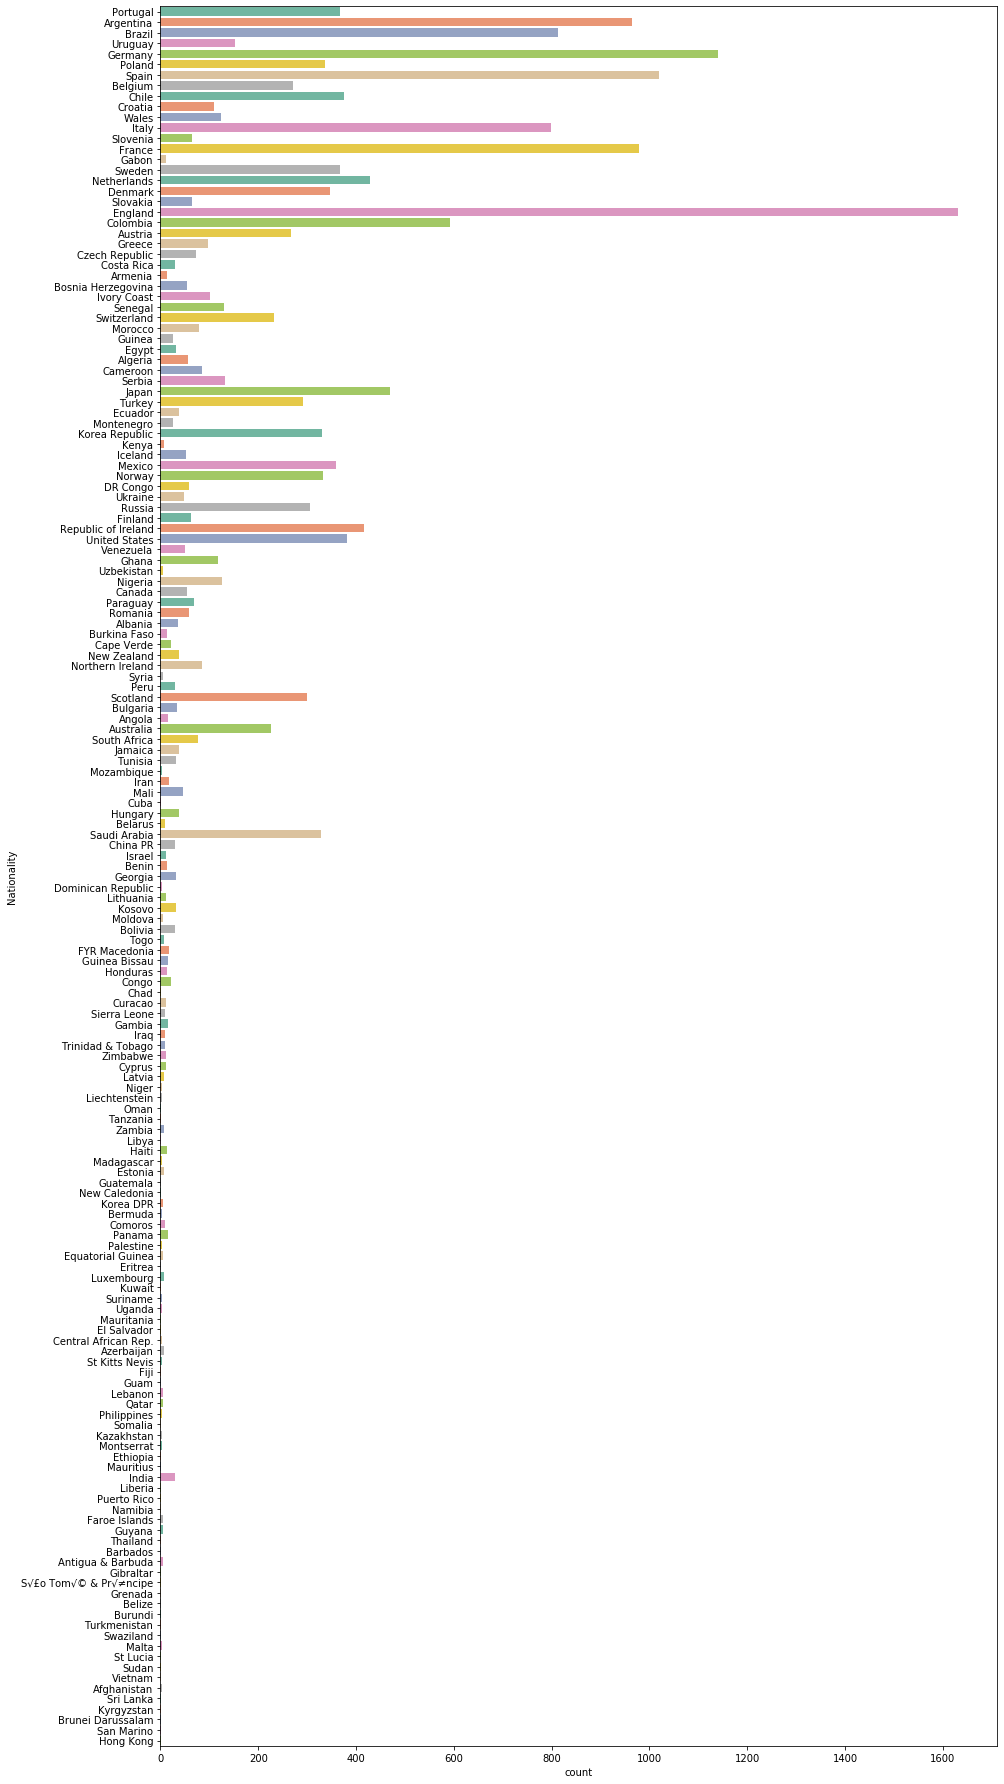

In [28]:
#del df[''] #deletes the column GKReflexes
#df.head()
plt.figure(figsize=(15,32))

sns.countplot(y = df.Nationality,palette="Set2") #Plot all the nations on Y Axis


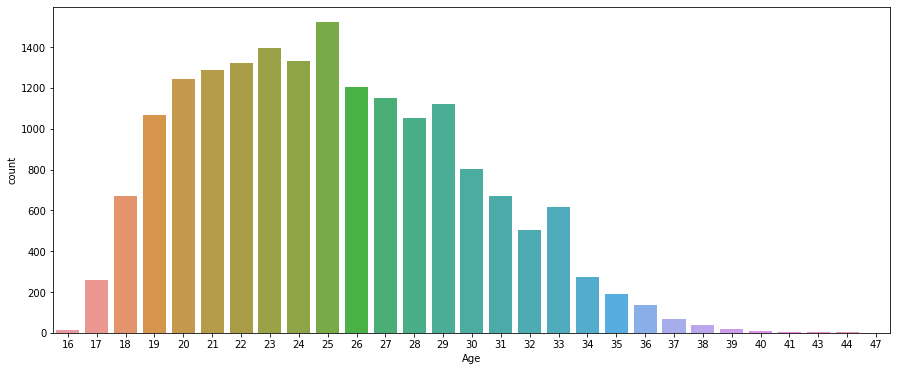

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(x="Age",data=df) 

In [33]:
#weights
a = 0.5
b = 1
c = 2
d = 3

#GoalKeeping Characterstics
df['gk_Shot_Stopper'] = (b*df.Reactions + b*df.Composure + a*df.Sprint_Speed + a*df.Strength + c*df.Jumping + b*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.Sprint_Speed + a*df.Short_Passing + a*df.Long_Passing + b*df.Jumping + b*df.GK_Positioning + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking + c*df.Vision)/(2*a + 4*b + 3*c + 2*d)

Text(0, 0.5, 'Shot Stopping Score')

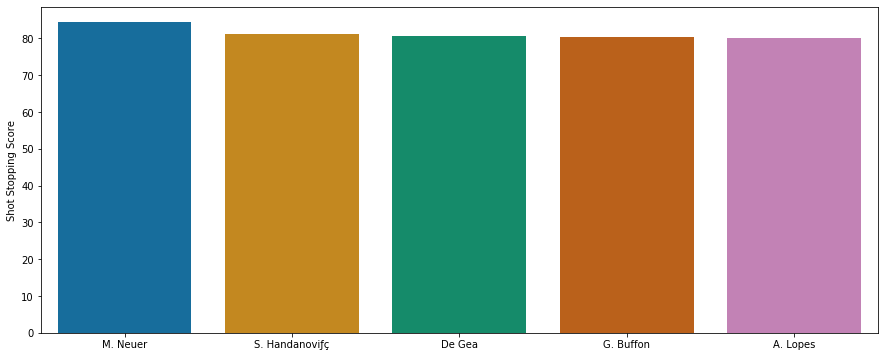

In [34]:

plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

Text(0, 0.5, 'Sweeping Score')

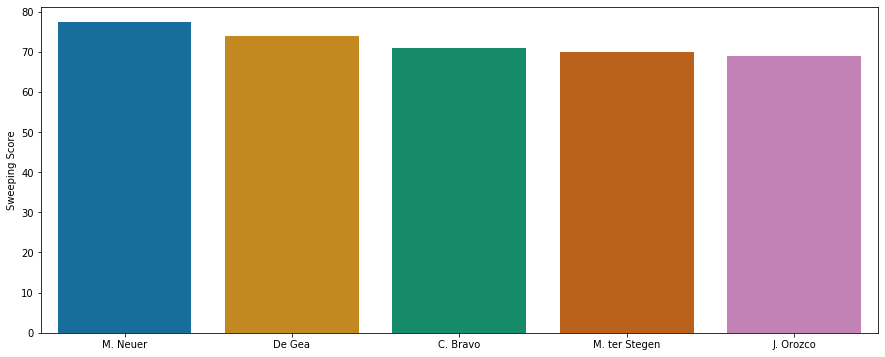

In [35]:
plt.figure(figsize=(15,6))
sd = df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Sweeping Score")

In [56]:
df['Player_Potential'] = ((df.Potential-df.Overall)*df.Overall)

plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
ssd = df[df['Overall'] > 60]
ssd = ssd[ssd['Potential'] > 86]
sd = ssd.sort_values('Player_Potential', ascending=False)[:10]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['Player_Potential']))
y2 = np.array(list(sd['Wage_K']))
sns.barplot(x1, y1, y2, palette= "colorblind")
plt.ylabel("Player Potential Growth")


TypeError: unsupported operand type(s) for &: 'str' and 'bool'